In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# 한글 설정
matplotlib.rcParams['font.family'] = 'AppleGothic'

In [16]:
# load france_data
france_data = pd.read_csv("./data/train_france.csv")
france_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,3
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,3
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,4
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,3
4,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0,3


In [17]:
# preprocessing 
# drop unnecessary columns ["CustomerId", "Surname"]
france_data = france_data.drop(columns=["CustomerId", "Surname"])
france_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,3
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,3
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,4
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,3
4,6,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0,3


In [12]:
# 프랑스 데이터를 기반으로 남성, 여성별로 AgeGroup에 따른 Exited = 1인 고객 수를 시각화
france_data_exited = france_data[france_data['Exited'] == 1]

In [13]:
agegroup_exited_counts = france_data_exited.groupby("AgeGroup").size().reset_index(name="Count")
agegroup_exited_counts

,AgeGroup,Count
0,1,8
1,2,932
2,3,4060
3,4,6632
4,5,3168
5,6,707
6,7,62
7,8,2
8,9,1


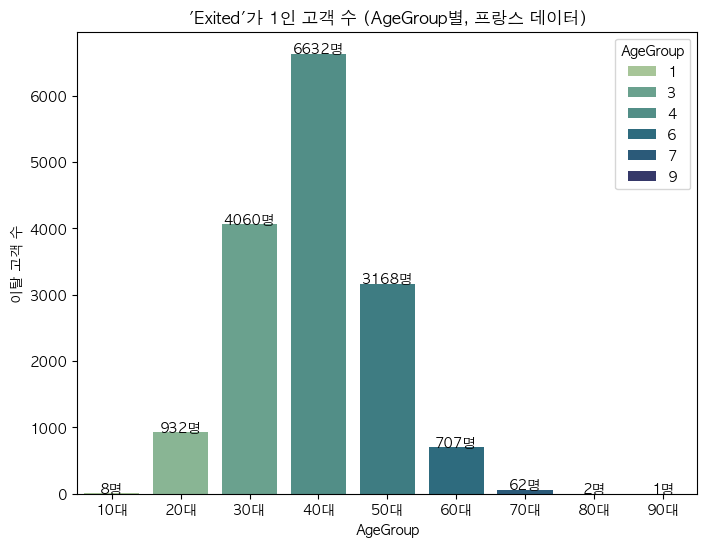

In [14]:
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=agegroup_exited_counts, 
            x="AgeGroup", y="Count",
            palette="crest", hue="AgeGroup")
plt.title("'Exited'가 1인 고객 수 (AgeGroup별, 프랑스 데이터)")
plt.ylabel("이탈 고객 수")
plt.xlabel("AgeGroup")
plt.xticks(ticks=range(0, 9), labels=[f"{i}0대" for i in range(1, 10)])
for index, row in agegroup_exited_counts.iterrows():
    barplot.text(row.name, row['Count'], f"{row['Count']}명", color='black', ha="center")
plt.show()

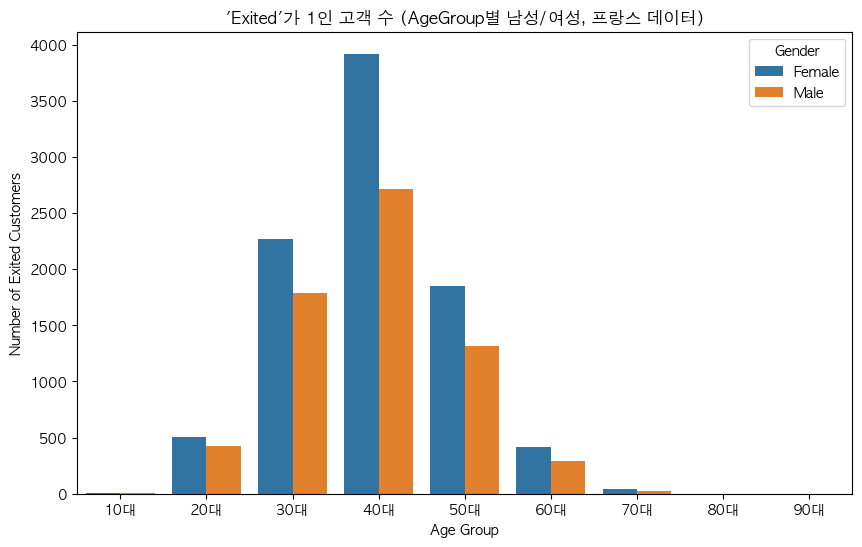

In [15]:
# 남성, 여성별로 AgeGroup에 따른 이탈 고객 수를 계산
agegroup_gender_exited_counts = france_data_exited.groupby(['AgeGroup', 'Gender']).size().reset_index(name='Count')

# Barplot 시각화 (hue를 사용하여 Gender 구분)
plt.figure(figsize=(10, 6))
sns.barplot(data=agegroup_gender_exited_counts, x='AgeGroup', y='Count', hue='Gender')
plt.title("'Exited'가 1인 고객 수 (AgeGroup별 남성/여성, 프랑스 데이터)")
plt.xlabel('Age Group')
plt.ylabel('Number of Exited Customers')
plt.xticks(ticks=range(0, 9), labels=[f'{i}0대' for i in range(1, 10)])
plt.legend(title='Gender')
plt.show()


### Age(AgeGroup) - Tenure 

In [29]:
france_data["Tenure"].describe()

count    94215.000000
mean         5.027554
std          2.792649
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

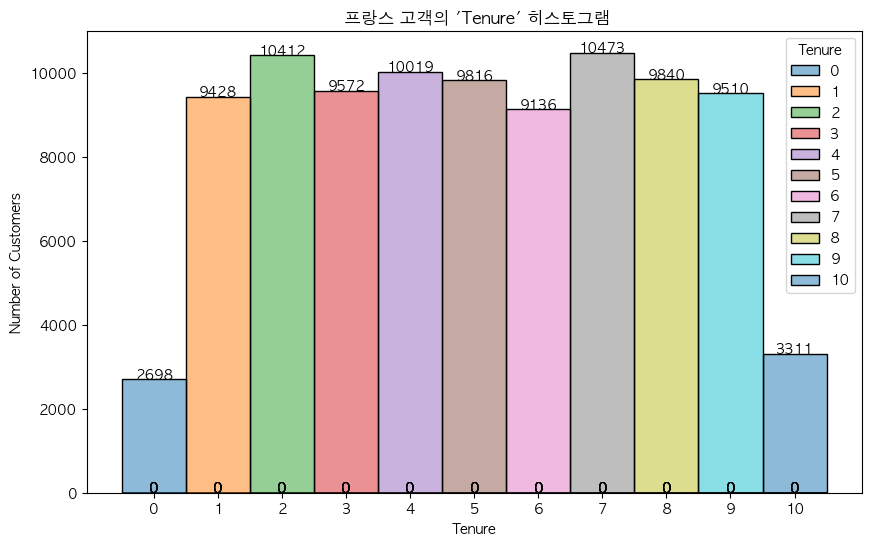

In [146]:
plt.figure(figsize=(10,6))
hist = sns.histplot(data=france_data, x="Tenure", 
             palette="tab10", hue="Tenure", 
             discrete=True,)
plt.title(" 프랑스 고객의 'Tenure' 히스토그램")
plt.ylabel("Number of Customers")
plt.xticks(range(0, 11))
# 막대 위에 고객 수 표시
for p in hist.patches:
    height = p.get_height()
    hist.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center')
plt.show()

-> 가입 기간이 7년, 2년, 4년인 고객의 수가 가장 많다. 

-> 가입 기간이 0년, 10년인 고객의 수가 압도적으로 적다. (6.37%)

-> 1년 이상 9년 이하인 고객의 수가 전체의 9할 이상 차지한다. 

-> 신규 고객과 장기 고객의 경우 극 소수이다. 

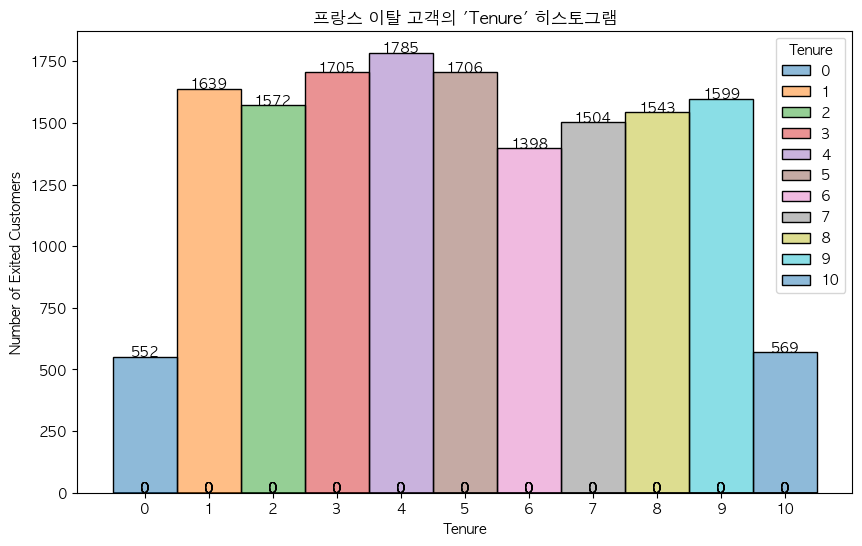

In [145]:
# 히스토그램을 그린 후 막대 위에 수치 추가
plt.figure(figsize=(10,6))
hist = sns.histplot(data=france_data_exited, x="Tenure", 
                    palette="tab10", hue="Tenure", 
                    discrete=True)

plt.title("프랑스 이탈 고객의 'Tenure' 히스토그램")
plt.ylabel("Number of Exited Customers")
plt.xticks(range(0, 11))

# 막대 위에 고객 수 표시
for p in hist.patches:
    height = p.get_height()
    hist.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center')

plt.show()


-> 가입 기간이 3, 4, 5년이 되는 해에 이탈하는 고객이 가장 많다. 

-> 가입 기간이 0년, 10년인 고객들은 다른 가입 기간(Tenure)에 비해 이탈 고객 수가 적다. (해당 기간에 이탈 비율이 적은 것이 아님. 절대적인 숫자가 작다는 의미)

In [115]:
france_data_tenure = pd.DataFrame(
    {
        "Tenure": np.arange(0, 11),
        # 가입 기간에 해당하는 전체 고객 수 
        "TotalCount": france_data.groupby("Tenure")['id'].count(),
        # 가입 기간에 해당하는 전체 고객 비율 
        "TotalRatio": round(france_data.groupby("Tenure")['id'].count() / len(france_data), 5) * 100,
        # 가입 기간에 해당하는 이탈 고객 수 
        "ExitedCount": france_data_exited.groupby("Tenure")['id'].count(),
        # 가입 기간에 해당하는 이탈 고객 비율 (전체 이탈 고객 대비 비율)
        "ExitedRatio": round(france_data_exited.groupby("Tenure")['id'].count() / len(france_data_exited), 5) * 100,
        # 전체 고객 대비 이탈 고객 비율 (프랑스 전체 고객 대비 비율)
        "TotalExitedRatio" : round(france_data_exited.groupby("Tenure")['id'].count() / len(france_data), 5) * 100,
    }
).set_index("Tenure")
france_data_tenure

,TotalCount,TotalRatio,ExitedCount,ExitedRatio,TotalExitedRatio
Tenure,,,,,
0,2698,2.864,552,3.545,0.586
1,9428,10.007,1639,10.525,1.740
2,10412,11.051,1572,10.095,1.669
3,9572,10.160,1705,10.949,1.810
4,10019,10.634,1785,11.463,1.895
5,9816,10.419,1706,10.956,1.811
6,9136,9.697,1398,8.978,1.484
7,10473,11.116,1504,9.658,1.596
8,9840,10.444,1543,9.909,1.638


In [118]:
france_data_tenure["ExitedTenureRatio"] = round(france_data_tenure["ExitedCount"] / france_data_tenure["TotalCount"], 5) * 100
france_data_tenure

,TotalCount,TotalRatio,ExitedCount,ExitedRatio,TotalExitedRatio,ExitedTenureRatio
Tenure,,,,,,
0,2698,2.864,552,3.545,0.586,20.460
1,9428,10.007,1639,10.525,1.740,17.384
2,10412,11.051,1572,10.095,1.669,15.098
3,9572,10.160,1705,10.949,1.810,17.812
4,10019,10.634,1785,11.463,1.895,17.816
5,9816,10.419,1706,10.956,1.811,17.380
6,9136,9.697,1398,8.978,1.484,15.302
7,10473,11.116,1504,9.658,1.596,14.361
8,9840,10.444,1543,9.909,1.638,15.681


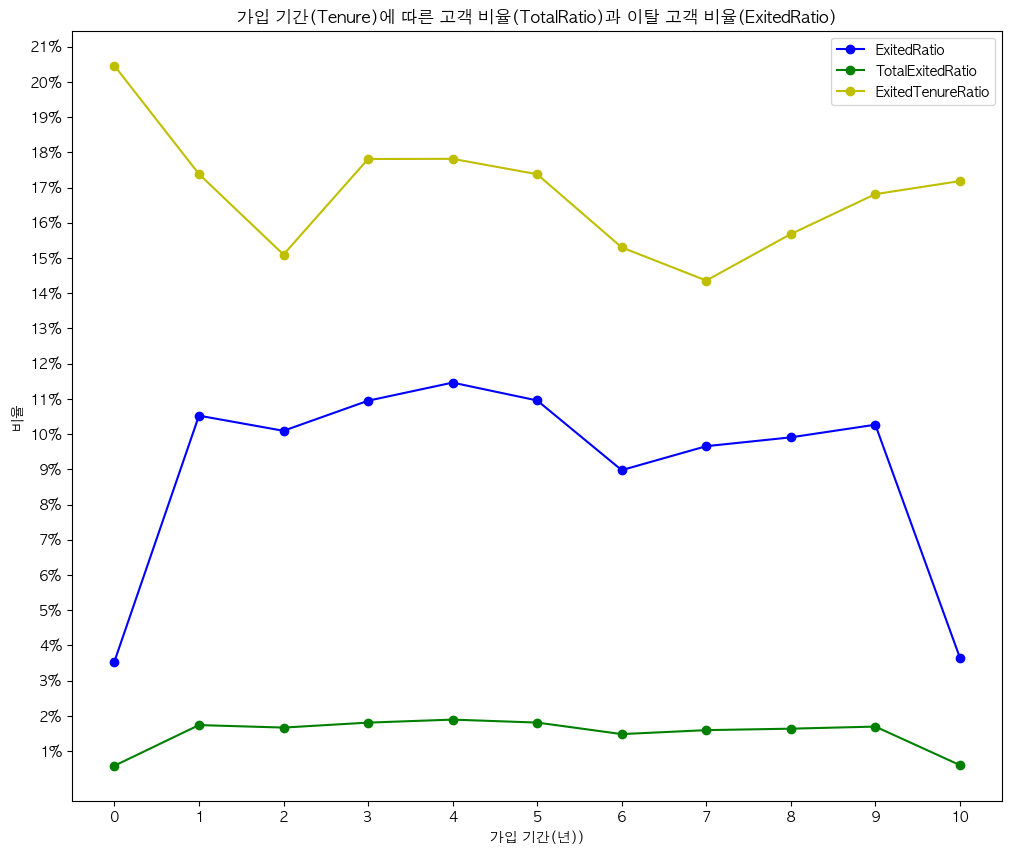

In [130]:
plt.figure(figsize=(12, 10))
# 전프랑스 전체 고객 수 대비, 해당 가입 기간에 속하는 고객의 비율 
# plt.plot(france_data_tenure["TotalRatio"], "ro-", label="TotalRatio(프랑스 전체 고객 대비 비율)")

# 프랑스 이탈 고객 수 대비, 해당 가입 기간에 속하는 이탈 고객 비율 
plt.plot(france_data_tenure["ExitedRatio"], "bo-", label="ExitedRatio")

# 프랑스 전체 고객 수 대비, 해당 가입 기간에 속하는 이탈 고객 비율 
plt.plot(france_data_tenure["TotalExitedRatio"], "go-", label="TotalExitedRatio")

# Tenure에 속하는 고객 수 대비, 해당 가입 기간에 속하는 이탈 고객 비율 
plt.plot(france_data_tenure["ExitedTenureRatio"], "yo-", label="ExitedTenureRatio")

plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(1, 22), labels=[f"{i}%" for i in range(1, 22)])
plt.title("가입 기간(Tenure)에 따른 고객 비율(TotalRatio)과 이탈 고객 비율(ExitedRatio)")
plt.xlabel("가입 기간(년))")
plt.ylabel("비율")
plt.legend()
plt.show()


1. **ExitedRatio** (Blue, 프랑스 전체 이탈 고객 수 대비, 해당 가입 기간에 이탈한 고객 비율)  
   1. 프랑스의 이탈 고객 중 가입 기간이 1년 이상 10년 미만인 이탈 고객이 프랑스 전체 이탈 고객의 93% 이상을 차지한다. 
   2. 프랑스의 이탈 고객 중 가입 기간이 1년 미만 혹은 10년 이상인 이탈 고객은 프랑스 전체 이탈 고객 중 약 7%를 차지한다.
   3. 프랑스의 이탈 고객 중 가입 기간이 4년인 고객의 이탈 비율이 11.463%로 가장 높은 비율을 차지한다.
   
2. **TotalExitedRatio** (Green, 프랑스 전체 고객 수 대비, 해당 가입 기간에 이탈한 고객 비율)  
   1. 프랑스 전체 고객 중 가입 기간이 1년 미만 혹은 10년 이상인 경우, 각각 500명 중반의 이탈 고객을 가진다. 
   2. 프랑스 전체 고객 중 가입 기간이 1년 이상 혹은 10년 미만인 경우, 각각 1500명 중반의 이탈 고객을 가진다. 
   
3. **ExitedTenureRatio** (Yellow, 각각의 가입 기간에 해당하는 전체 프랑스 고객 수 대비, 해당 가입 기간에 이탈한 고객 비율)  
   1. 가입 기간이 1년 미만인 프랑스 고객(2698) 중 이탈 고객은 552명으로 약 20%를 차지한다.  
      (가입한 지 1년도 되지 않았지만 이탈하는 고객이 5명중 1명)
   2. 가입 기간이 각각 2년, 7년인 프랑스 고객 중 이탈 고객은 각각 약 15%, 14%로 그나마 낮은 비율을 차지한다.  
   -> 가입 기간이 몇년 되었든, 14% 이상은 이탈을 한다.

**수정 필요**

~~-> 가입 기간이 1년 이상이거나 10년 미만인 경우, 이탈 고객 비율이 10%내외로 비슷한 비율을 보인다.~~

~~-> 가입 기간이 1년 미만이거나 10년 이상(최대 10년)인 경우에 이탈 고객 비율이 1년 ~ 9년에 비해 약 7%p 정도 감소하는 것을 볼 수 있다.~~

~~-> 프랑스 전체 고객 대비 각각의 가입 기간에 이탈한 고객 비율은 모두 2% 미만으로 전체 고객 대비 비율은 큰 차이를 보이지 않지만,  
프랑스 전체 고객 수가 10만명에 육박하기 때문에 이런 비슷한 비율을 보이는 것 같다.  
(실제 가입 기간이 1년 미만인 이탈 고객의 수는 552명,  4년인 이탈 고객의 수는 1785명으로 3배 이상 차이가 난다.)~~

~~-> 프랑스의 이탈 고객의 경우 1년이상 10년 미만의 가입기간을 갖는 고객이 대부분의 비율을 차지한다.~~ 

~~-> 프랑스 전체 고객으로 본다면, 모든 가입 기간에~~

~~why?~~
~~1. 가입 기간이 짧다. (1년 미만)~~
   ~~1.   비교적 최근에 상품 가입을 했기 때문에, 당장 이탈 고객이 될 가능성이 낮아진다.~~
    
~~2. 가입 기간이 길다. (10년 이상)~~
   ~~1. 휴면 고객 여부 확인 -> `IsActiveMember`~~
   ~~2. 가입 상품 개수 확인 -> `NumOfProduct`~~